K-means Clustering

Create dataset using scikit learn

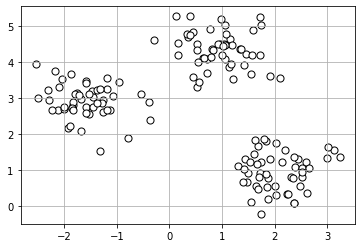

In [1]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=0.5,shuffle=True,
               random_state=0)
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c='white',edgecolor='black',marker='o',s=50)
plt.grid()
plt.show()


implemntation of K means

In [2]:
## Kmeans
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km=km.fit_predict(X)


plot the result of cluster and Data points

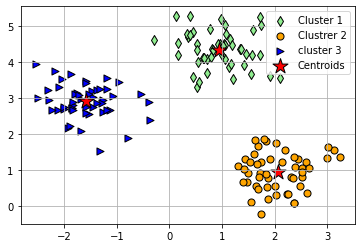

Distortion:72.48


In [3]:
# plotting
plt.figure()
plt.scatter(X[y_km==0,0],X[y_km==0,1],s=50,c='lightgreen',marker='d',edgecolor='black',
            label='Cluster 1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],s=50,c='orange',marker='o',edgecolor='black',
            label='Clustrer 2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],s=50,c='blue',marker='>',edgecolor='black',
            label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],
            s=250,marker='*',color='red',
            edgecolor='black',label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()
print('Distortion:%.2f'%km.inertia_)


Elbow method to find optimal number of K

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


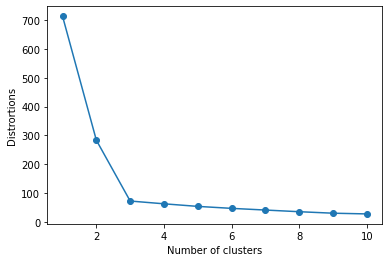

In [4]:
distortions=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,
              random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distrortions')
plt.show()

Create a dataset

In [5]:
import pandas as pd
import numpy as np
np.random.seed(123)
variables=['x','y','z']
labels=['ID1','ID2','ID3','ID4','ID5']
X=np.random.random([5,3])*10
df=pd.DataFrame(X,columns=variables,index=labels)
print(df)


            x         y         z
ID1  6.964692  2.861393  2.268515
ID2  5.513148  7.194690  4.231065
ID3  9.807642  6.848297  4.809319
ID4  3.921175  3.431780  7.290497
ID5  4.385722  0.596779  3.980443


Calculate distance matrix as input to hierarchical clustering

In [6]:
from scipy.spatial.distance import pdist,squareform
row_dist=pd.DataFrame(squareform(pdist(df,metric='euclidean')),
                      columns=labels,index=labels)
print(row_dist)

          ID1       ID2       ID3       ID4       ID5
ID1  0.000000  4.973534  5.516653  5.899885  3.835396
ID2  4.973534  0.000000  4.347073  5.104311  6.698233
ID3  5.516653  4.347073  0.000000  7.244262  8.316594
ID4  5.899885  5.104311  7.244262  0.000000  4.382864
ID5  3.835396  6.698233  8.316594  4.382864  0.000000


calculate linkage matrix

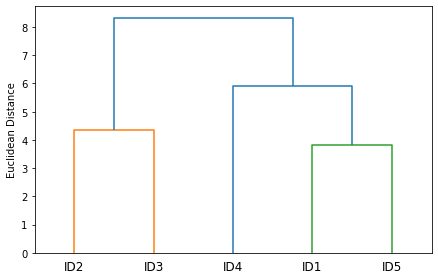

In [7]:
from scipy.cluster.hierarchy import linkage
row_clusters=linkage(df.values,method='complete',metric='euclidean')
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
row_dendr=dendrogram(row_clusters,labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean Distance')
plt.show()


<ipython-input-10-d5939023fada>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_xticklabels(['']+list(df_rowclust.columns))
<ipython-input-10-d5939023fada>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_yticklabels(['']+list(df_rowclust.index))


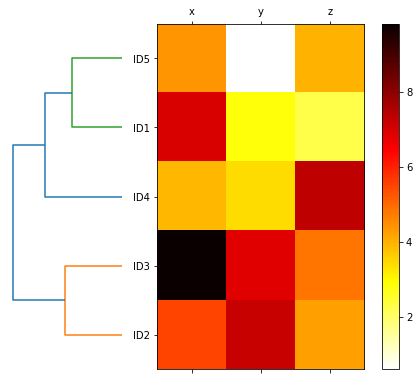

In [10]:
## hitmap
fig=plt.figure(figsize=(8,8), facecolor='white')
axd=fig.add_axes([0.09,0.1,0.2,0.6])
row_dendr=dendrogram(row_clusters,orientation='left')
df_rowclust=df.iloc[row_dendr['leaves'][::-1]]
axm=fig.add_axes([0.23,0.1,0.6,0.6])
cax=axm.matshow(df_rowclust,interpolation='nearest',
                cmap='hot_r')
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels(['']+list(df_rowclust.columns))
axm.set_yticklabels(['']+list(df_rowclust.index))
plt.show()

Agglomerative Clustering

In [11]:
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=3,affinity='euclidean',
                            linkage='complete')
labels=ac.fit_predict(X)
print('Cluster labels:%s'%labels)



Cluster labels:[1 0 0 2 1]


create make moon dataset

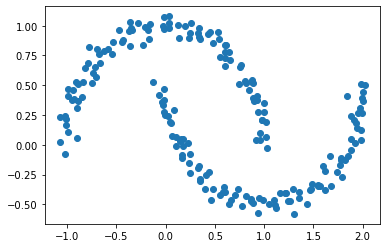

In [12]:
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=200,noise=0.05,random_state=0)
import matplotlib.pyplot as plt  
plt.scatter(X[:,0],X[:,1])
plt.show()

implementation of K-Means

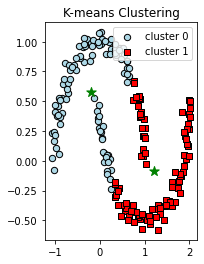

In [13]:
from sklearn.cluster import KMeans
plt.subplot(1,2,1)
km=KMeans(n_clusters=2,random_state=0)
y_km=km.fit_predict(X)


plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightblue',edgecolor='black',
            marker='o',s=40,label='cluster 0')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='red',edgecolor='black',
            marker='s',s=40,label='cluster 1')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='green',
            marker='*',s=100)
plt.title('K-means Clustering')
plt.legend()
plt.show()

implemtation of Agglomerative

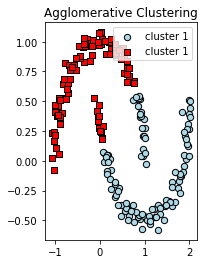

In [14]:
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=2,affinity='euclidean',
                           linkage='complete')
y_ac=ac.fit_predict(X)
plt.subplot(1,2,2)


plt.scatter(X[y_ac==0,0],X[y_ac==0,1],c='lightblue',edgecolor='black',
            marker='o',s=40,label='cluster 1')
plt.scatter(X[y_ac==1,0],X[y_ac==1,1],c='red',edgecolor='black',
            marker='s',s=40,label='cluster 1')
plt.title('Agglomerative Clustering')
plt.legend()
plt.show()

implementation of DBSCAN

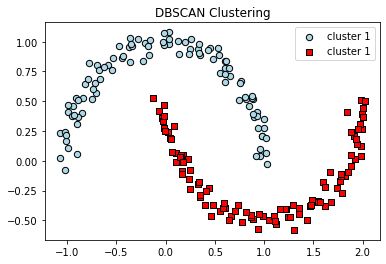

In [15]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.2,min_samples=5,metric='euclidean')
y_db=db.fit_predict(X)
plt.figure()
plt.scatter(X[y_db==0,0],X[y_db==0,1],c='lightblue',edgecolor='black',
            marker='o',s=40,label='cluster 1')
plt.scatter(X[y_db==1,0],X[y_db==1,1],c='red',edgecolor='black',
            marker='s',s=40,label='cluster 1')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()